<a href="https://colab.research.google.com/github/SLCFLAB/DL-Forecasting/blob/main/DL/day2/day2_2_Practice3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install neuralforecast datasetsforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.0/727.0 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.0/275.0 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.6/154.6 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.4/301.4 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.4/763.4 kB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 15.3 MB/s 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast.losses.numpy import mae
from neuralforecast.core import NeuralForecast
from neuralforecast.models import Informer, Autoformer, FEDformer, PatchTST
from datasetsforecast.long_horizon import LongHorizon

### Data 전처리

In [ ]:
data_gold = pd.read_csv('https://raw.githubusercontent.com/SLCFLAB/DL-Forecasting/main/DL/day2/datasets/gold.csv')
data_silver = pd.read_csv('https://raw.githubusercontent.com/SLCFLAB/DL-Forecasting/main/DL/day2/datasets/silver.csv')

In [ ]:
def standard_scaler(data):
    mean = data['y'].mean()
    std = data['y'].std()
    data['y'] = (data['y']-mean)/std
    return mean, std, data

In [ ]:
mean_gold, std_gold, data_gold = standard_scaler(data_gold)
mean_silver, std_silver, data_silver = standard_scaler(data_silver)

In [ ]:
data = pd.concat([data_gold,data_silver])
data

,ds,y,unique_id
0,0,-1.336501,gold
1,1,-1.323519,gold
2,2,-1.260577,gold
3,3,-1.291655,gold
4,4,-1.246415,gold
...,...,...,...
1285,1285,0.951773,silver
1286,1286,0.983087,silver
1287,1287,0.920697,silver
1288,1288,0.968616,silver


### **학습**

In [ ]:
horizon = 1

In [ ]:
%%capture
models_tf = [Informer(h=horizon,                    # Forecasting horizon
                      input_size=10,                # Input size
                      max_steps=2000,               # Number of training iterations
                      val_check_steps=100,          # Compute validation loss every 100 steps
                      early_stop_patience_steps=3), # Stop training if validation loss does not improve
             Autoformer(h=horizon,
                        input_size=30,
                        max_steps=1000,
                        val_check_steps=100,
                        early_stop_patience_steps=3),
             PatchTST(h=horizon,
                        input_size=30,
                        max_steps=1000,
                        val_check_steps=100,
                        early_stop_patience_steps=3),
             ]

INFO:lightning_fabric.utilities.seed:Global seed set to 1
INFO:lightning_fabric.utilities.seed:Global seed set to 1
INFO:lightning_fabric.utilities.seed:Global seed set to 1


In [ ]:
tf = NeuralForecast(models=models_tf, freq='D')

data_tf = tf.cross_validation(df=data,
                               val_size=int(.1*len(data.ds.unique())),
                               test_size=int(.1*len(data.ds.unique())),
                               n_windows=None)

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

In [ ]:
data_tf

,unique_id,ds,cutoff,NHITS,y
0,gold,1161,1160,1.092694,1.150495
1,gold,1162,1161,1.178643,1.153642
2,gold,1163,1162,1.184329,1.181573
3,gold,1164,1163,1.191761,1.174098
4,gold,1165,1164,1.181115,1.215010
...,...,...,...,...,...
253,silver,1285,1284,0.912532,0.951773
254,silver,1286,1285,0.976061,0.983087
255,silver,1287,1286,1.015813,0.920697
256,silver,1288,1287,0.971773,0.968616


In [ ]:
tf_predict = data_tf[data_tf['ds']-data_tf['cutoff']==horizon]
tf_predict

,unique_id,ds,cutoff,NHITS,y
0,gold,1161,1160,1.092694,1.150495
1,gold,1162,1161,1.178643,1.153642
2,gold,1163,1162,1.184329,1.181573
3,gold,1164,1163,1.191761,1.174098
4,gold,1165,1164,1.181115,1.215010
...,...,...,...,...,...
253,silver,1285,1284,0.912532,0.951773
254,silver,1286,1285,0.976061,0.983087
255,silver,1287,1286,1.015813,0.920697
256,silver,1288,1287,0.971773,0.968616


In [ ]:
tf_gold = tf_predict[tf_predict['unique_id']=='gold']
tf_silver = tf_predict[tf_predict['unique_id']=='silver']

In [ ]:
tf_gold

,unique_id,ds,cutoff,NHITS,y
0,gold,1161,1160,1.092694,1.150495
1,gold,1162,1161,1.178643,1.153642
2,gold,1163,1162,1.184329,1.181573
3,gold,1164,1163,1.191761,1.174098
4,gold,1165,1164,1.181115,1.215010
...,...,...,...,...,...
124,gold,1285,1284,1.201424,1.207929
125,gold,1286,1285,1.225531,1.216191
126,gold,1287,1286,1.249491,1.196128
127,gold,1288,1287,1.228698,1.228779


### **결과 분석**

In [ ]:
tf_gold[['Informer','Autoformer','PatchTST','y']] = tf_gold[['Informer','Autoformer','PatchTST','y']]*std_gold + mean_gold
tf_silver[['Informer','Autoformer','PatchTST','y']] = tf_silver[['Informer','Autoformer','PatchTST','y']]*std_silver + mean_silver

<ipython-input-15-6b7beb5a65b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nn_gold[['NHITS','y']] = nn_gold[['NHITS','y']]*std_gold + mean_gold
<ipython-input-15-6b7beb5a65b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nn_silver[['NHITS','y']] = nn_silver[['NHITS','y']]*std_silver + mean_silver


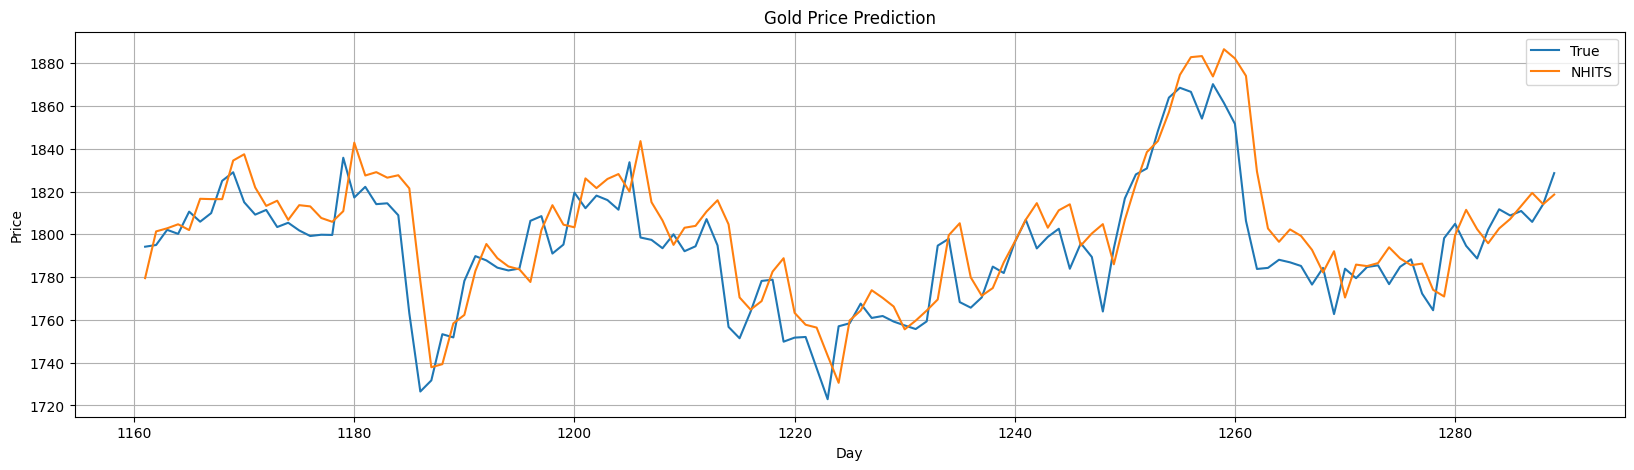

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(tf_gold['ds'], tf_gold['y'], label='True')
plt.plot(tf_gold['ds'], tf_gold['Informer'], label='Informer')
plt.plot(tf_gold['ds'], tf_gold['Autoformer'], label='Autoformer')
plt.plot(tf_gold['ds'], tf_gold['PatchTST'], label='PatchTST')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Gold Price Prediction')
plt.grid()
plt.legend()
plt.savefig('gold_tf_5step.png')
plt.show()

In [ ]:
mae_informer = mae(tf_gold['y'], tf_gold['Informer'])
mae_autoformer = mae(tf_gold['y'], tf_gold['Autoformer'])
mae_patchtst = mae(tf_gold['y'], tf_gold['PatchTST'])

print(f'Informer: {mae_informer:.3f}')
print(f'Autoformer: {mae_autoformer:.3f}')
print(f'PatchTST: {mae_patchtst:.3f}')

LSTM: 14.107
TCN: 166.129
NHITS: 11.872


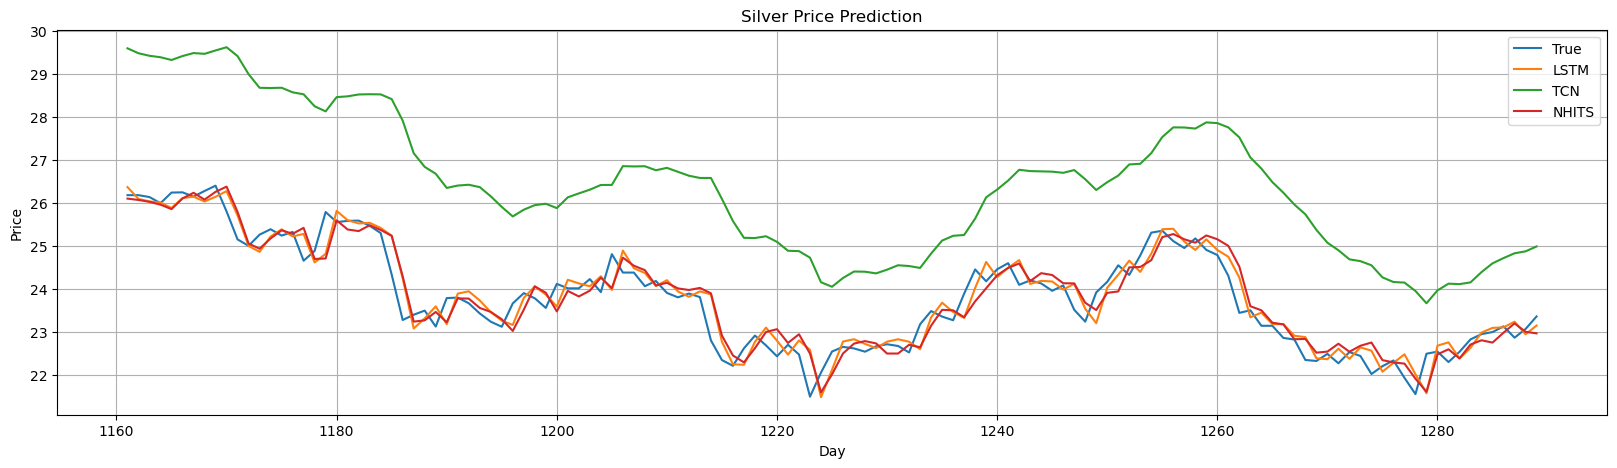

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(tf_silver['ds'], tf_silver['y'], label='True')
plt.plot(tf_silver['ds'], tf_silver['Informer'], label='Informer')
plt.plot(tf_silver['ds'], tf_silver['Autoformer'], label='Autoformer')
plt.plot(tf_silver['ds'], tf_silver['PatchTST'], label='PatchTST')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Silver Price Prediction')
plt.grid()
plt.legend()
plt.savefig('silver_tf_5step.png')
plt.show()

In [ ]:
mae_informer = mae(tf_silver['y'], tf_silver['Informer'])
mae_autoformer = mae(tf_silver['y'], tf_silver['Autoformer'])
mae_patchtst = mae(tf_silver['y'], tf_silver['PatchTST'])

print(f'Informer: {mae_informer:.3f}')
print(f'Autoformer: {mae_autoformer:.3f}')
print(f'PatchTST: {mae_patchtst:.3f}')

LSTM: 0.295
TCN: 2.603
NHITS: 0.309


### **ETTm2 Data**
Reference: https://nixtla.github.io/neuralforecast/examples/longhorizon_with_transformers.html

In [ ]:
# Change this to your own data to try the model
Y_df, _, _ = LongHorizon.load(directory='./', group='ETTm2')
Y_df['ds'] = pd.to_datetime(Y_df['ds'])

n_time = len(Y_df.ds.unique())
val_size = int(.2 * n_time)
test_size = int(.2 * n_time)

Y_df.groupby('unique_id').head(2)

Global seed set to 1
Global seed set to 1
Global seed set to 1


In [ ]:
%%capture
horizon = 96 # 24hrs = 4 * 15 min.
models = [Informer(h=horizon,                 # Forecasting horizon
                input_size=horizon,           # Input size
                max_steps=1000,               # Number of training iterations
                val_check_steps=100,          # Compute validation loss every 100 steps
                early_stop_patience_steps=3), # Stop training if validation loss does not improve
          Autoformer(h=horizon,
                input_size=horizon,
                max_steps=1000,
                val_check_steps=100,
                early_stop_patience_steps=3),
          PatchTST(h=horizon,
                input_size=horizon,
                max_steps=1000,
                val_check_steps=100,
                early_stop_patience_steps=3),
         ]

In [ ]:
%%capture
nf = NeuralForecast(
    models=models,
    freq='15min')

Y_hat_df = nf.cross_validation(df=Y_df,
                               val_size=val_size,
                               test_size=test_size,
                               n_windows=None)

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

In [ ]:
Y_plot = Y_hat_df[Y_hat_df['unique_id']=='OT'] # OT dataset
cutoffs = Y_hat_df['cutoff'].unique()[::horizon]
Y_plot = Y_plot[Y_hat_df['cutoff'].isin(cutoffs)]

plt.figure(figsize=(20,5))
plt.plot(Y_plot['ds'], Y_plot['y'], label='True')
plt.plot(Y_plot['ds'], Y_plot['Informer'], label='Informer')
plt.plot(Y_plot['ds'], Y_plot['Autoformer'], label='Autoformer')
plt.plot(Y_plot['ds'], Y_plot['PatchTST'], label='PatchTST')
plt.xlabel('Datestamp')
plt.ylabel('OT')
plt.grid()
plt.legend()

,unique_id,ds,cutoff,Informer,Autoformer,PatchTST,y
0,gold,1161,1160,1.076379,1.069973,1.116271,1.150495
1,gold,1162,1161,1.121508,1.103007,1.175186,1.153642
2,gold,1163,1162,1.123072,1.165346,1.169328,1.181573
3,gold,1164,1163,1.149099,1.113124,1.184329,1.174098
4,gold,1165,1164,1.135098,1.170680,1.190378,1.215010
...,...,...,...,...,...,...,...
253,silver,1285,1284,0.902388,0.973965,0.923755,0.951773
254,silver,1286,1285,0.908349,0.979009,0.948709,0.983087
255,silver,1287,1286,0.965376,1.002293,0.983380,0.920697
256,silver,1288,1287,0.917720,0.939825,0.931675,0.968616


In [ ]:
mae_informer = mae(Y_hat_df['y'], Y_hat_df['Informer'])
mae_autoformer = mae(Y_hat_df['y'], Y_hat_df['Autoformer'])
mae_patchtst = mae(Y_hat_df['y'], Y_hat_df['PatchTST'])

print(f'Informer: {mae_informer:.3f}')
print(f'Autoformer: {mae_autoformer:.3f}')
print(f'PatchTST: {mae_patchtst:.3f}')

For reference, we can check the performance when compared to self-reported performance in their respective papers.

| Horizon   | PatchTST     | AutoFormer | Informer | ARIMA
|---        |---           |---         |---       |---
|  96       |  **0.256**   |   0.339    |  0.453   | 0.301
|  192      |  0.296       |   0.340    |  0.563   | 0.345
|  336      |  0.329       |   0.372    |  0.887   | 0.386
|  720      |  0.385       |   0.419    |  1.388   | 0.445